In [1]:
import networkx as nx
from cdlib import viz
from cdlib import NodeClustering
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from importlib import reload

In [2]:
# mengambil hasil, ada di result.txt
hasil = [['ABL1', 'ABL2'],
 ['ACSL6', 'ACSL3', 'FASN'],
 ['BCOR',  'MLLT6',  'AFF1',  'MLLT1',  'ELL',  'MLLT10',  'MLLT3',  'DOT1L',  'AFF4',  'RYBP',  'HEXIM1',  'SETD2'],
 ['AKAP9', 'GPC3', 'EXT2', 'PKN1', 'PDE4DIP', 'IGF2', 'KLK2', 'EXT1', 'GPC5'],
 ['STAG2',  'RAD21',  'MLH1',  'MSH6',  'BRIP1',  'BARD1',  'PALB2',  'MSH3',  'NBN',  'RAD51B',  'STAG1',
  'XPA',  'RAD51C',  'RTEL1',  'MGMT',  'POLD1',  'SLX4',  'XPC',  'FAM175A',  'ERCC5',  'MDM4',  'PMS1',
  'ERCC4',  'SMC1A',  'ATM',  'POLE',  'WRN',  'FANCD2',  'BRCA2',  'RAD50',  'BLM',  'RAD17',  'CHEK1',
  'ATR',  'CHEK2',  'MRE11A',  'TP53BP1',  'FANCE',  'FANCC',  'FANCF',  'FANCG',  'FANCA',  'MDC1',  'BRCA1',
  'RAD51',  'ERCC2',  'ERCC3',  'POLG',  'PPP6C',  'FLNA',  'CDC73',  'TCEA1',  'BABAM1',  'EWSR1',  'RECQL4',
  'RECQL',  'MSH2',  'FEN1',  'RMI2',  'TOP1',  'RAD54L',  'POT1',  'MUTYH',  'PMS2',  'XRCC2',
  'RAD51D',  'BRD3',  'WHSC1',  'NTHL1'],
 ['RPS6KA4',  'GLI1',  'LATS1',  'LATS2',  'LZTR1',  'SPRED1',  'SUFU',  'MCL1',  'DCUN1D1',  'TFEB',  'BCL2',
  'STIL',  'CUL3',  'PRKACA',  'NF2',  'SPOP',  'BAX',  'CREB1',  'MITF',  'PRKAR1A',  'DDIT3',  'BCL2L11',
  'CIITA',  'PTCH1',  'KEAP1',  'NF1',  'CRTC3',  'SMO',  'PER1',  'CRTC1',  'NFE2L2',  'ASPSCR1',  'TFE3',  'ATF1',
  'CREB3L2'],
 ['EPS15',  'SEPT5',  'HIP1',  'PICALM',  'CLTCL1',  'SEPT9',  'CLTC',  'PARK2',  'SEPT6'],
 ['DDX5',  'SOX17',  'MAGI1',  'TBL1XR1',  'CCND1',  'CDKN1B',  'ZBTB16',  'CDK4',  'CCND2',  'CCNE1',  'DNMT1',
  'TP63',  'TFPT',  'GPS2',  'CDK6',  'RB1',  'TP53',  'RUNX1',  'TERT',  'DNMT3A',  'DNMT3B',  'KMT2C',
  'CTNNB1',  'KDM6A',  'CCND3',  'KMT2B',  'TCF12',  'WWTR1',  'CDKN1A',  'SPEN',  'CDKN2A',  'PBX1',
  'YAP1',  'TAF12',  'ACVR1',  'ACVR2A',  'INHBA',  'ETV1',  'ETV4',  'BMPR1A',  'BMP5',  'INHA',
  'ETV5',  'SMAD2',  'SMAD3',  'SMAD4',  'MYCN',  'FAT1',  'FBXO11',  'FLI1',  'NOTCH4',  'NOTCH3',
  'NOTCH1',  'SOX2',  'NKX2-1',  'FOXL2',  'HOXA11',  'FOXO3',  'PAX3',  'MYC',  'NPM1',  'FSTL3',
  'DROSHA',  'LMO2',  'LMO1',  'H3F3C',  'TET1',  'HIST1H1C',  'KAT7',  'HMGA1',  'HMGA2',
  'MYOD1',  'RARA',  'HOXA9',  'LYL1',  'AXIN1',  'CREBBP',  'EP300',  'PML',  'PRDM1',  'KLF6',
  'MAFB',  'KAT6B',  'KDM5A',  'MGA',  'PSIP1',  'PAX7',  'GSK3B',  'PAX5',  'ARNT',  'MECOM',
  'MKL1',  'JUN',  'FOXO4',  'AR',  'SKI',  'FOXO1',  'IRF4',  'NDRG1',  'PAX8',  'PLK2',
  'KAT6A',  'NCOR2',  'OLIG2',  'ESR1',  'SALL4',  'PRDM14',  'PRDM16',  'RXRA',  'HIF1A',  'STK40',
  'AMER1',  'APC',  'XPO1',  'SIX1',  'AXIN2',  'FOXA1',  'BRD4',  'SSX1',  'NCOR1',  'HOXB13',
  'TRIM33',  'SSX2',  'SS18L1',  'EZH2',  'CARM1',  'MAF',  'WT1',  'HEY1',  'TCF7L2',
  'NCOA3',  'ATRX',  'DAXX',  'NKX3-1',  'TMPRSS2',  'NCOA2',  'NCOA1',  'TRIM24',  'ARID1A',
  'HIST1H4F',  'SMARCB1',  'KMT2D',  'BCL7A',  'PBRM1',  'ARID1B',  'SS18',  'SMARCD1',  'SMARCA4',
  'SMARCE1',  'ARID2',  'VHL',  'EPAS1',  'ASXL1',  'EED',  'SUZ12',  'RNF2',  'TET2',  'EZH1',
  'BAP1',  'ASXL2',  'ATF7IP',  'SETDB1',  'MBD1',  'RFWD2',  'STK11',  'PARP1',  'H3F3B',  'HIST1H3J',
  'HIST3H3',  'CENPA',  'MAX',  'LEF1',  'TGFBR2',  'TGFBR1',  'TCF7L1',  'BCL11A',  'GATA1',
  'HIST1H2BD',  'ZEB1',  'PIM1',  'BCL9',  'BCL9L',  'BCLAF1',  'THRAP3',  'GREM1',  'GATA3',  'NUTM1',
  'WHSC1L1',  'BTG1',  'NFATC2',  'CBFA2T3',  'TAL1',  'PTK6',  'CCNC',  'MED12',  'CDK8',  'CEBPA',
  'HNF1A',  'MYB',  'CDKN2B',  'E2F3',  'CDKN2C',  'TRRAP',  'FBXW7',  'MEN1',  'EPCAM',  'CTNND2',
  'CDH11',  'ZFHX3',  'DDB2',  'CTCF',  'CDX2',  'POU5F1',  'PPARG',  'EBF1',  'GATA2',  'CSF3R',
  'DEK',  'RUNX1T1',  'CHD4',  'NAB2',  'IKZF1',  'SOX9',  'ID3',  'DNAJB1',  'KLF4',  'TCF3',  'KMT2A',
  'STAT6',  'MAML2'],
 ['MDM2',  'IKBKE',  'DDX3X',  'PCBP1',  'FUS',  'HNRNPA2B1',  'LSM14A',  'UPF1',  'NUP214',  'EIF1AX',  'EIF3E',
  'RPL5',  'ELF3',  'ERC1',  'SET',  'AGO2',  'NUP98',  'NUP93',  'CLP1',  'NOTCH2',  'RANBP2',  'TPR',  'DGCR8',
  'PABPC1',  'SRSF2',  'NONO',  'SFPQ',  'EIF4E',  'DDX6',  'DICER1',  'TAF15',  'SRSF3',  'NFKBIE',  'TANK',
  'BCL2L1',  'CASP3',  'CASP9',  'LARP4B',  'PDPK1',  'TRIM27',  'RFWD3',  'XIAP',  'MAP2K4',  'IKBKB',
  'RPL10',  'RPL22',  'U2AFBP',  'ZRSR2',  'TNFRSF14',  'CASP8',  'AURKB',  'NUF2',
  'BUB1B',  'CASC5',  'FZR1',  'BCL10',  'NFKBIA',  'BIRC3',  'MALT1',  'CARD11',  'BCL3',  'CYLD',
  'NFKB2',  'TRAF2',  'TNFAIP3',  'MRPL36',  'MYD88',  'NUMA1',  'COL1A1',  'COL3A1',  'COL2A1',  'PRKCI',
  'FIP1L1',  'CNOT3',  'EIF4A2',  'CPEB3',  'CNOT6',  'REL',  'SGK1',  'CRNKL1',  'SF3B1',  'PRPF40B'],
 ['ABI1',  'MAPK1',  'MAPK3',  'PIK3CA',  'EGFR',  'PIK3CB',  'RAC1',  'PIK3CG',  'MUC1',  'PIK3R1',  'WAS',
  'SOS1',  'GOLGA5',  'PLCG1',  'GNA11',  'GNAS',  'SDC4',  'PDGFRB',  'CBL',  'STAT5B',  'BCR',
  'PDGFB',  'LCK',  'DUSP4',  'STAT5A',  'MUC4',  'CRKL',  'ERRFI1',  'FYN',  'NRG1',  'YES1',  'LYN',
  'CTNND1',  'EPHA5',  'EPHA7',  'NTRK1',  'SRC',  'GRIN2A',  'ACKR3',  'EPHB1',  'CXCR4',  'ETV6',
  'FES',  'MSN',  'MUC16',  'TEK',  'IRS2',  'FGF19',  'FGFR4',  'FGF3',  'FGF4',  'ZMYM2',  'FGFR1OP',
  'PTEN',  'IL6ST',  'SH3GL1',  'SH2D1A',  'RAF1',  'ARAF',  'TSHR',  'JAK2',  'PIK3C2G',
  'PIK3R2',  'IL2',  'RAC2',  'INSRR',  'IRS4',  'CBLB',  'IL21R',  'INPP4A',  'ERBB3',
  'STAT3',  'PIK3C3',  'INPP4B',  'PAK1',  'TNC',  'TEC',  'INPPL1',  'INSR',  'PTPRB',  'IRS1',
  'PPP2R1A',  'KTN1',  'PTPN11',  'JAK1',  'RALGDS',  'PIK3CD',  'MYH11',  'MYH9',  'CDC42',  'PTPRS',  'TFG',
  'JAK3',  'RHOA',  'PPP4R2',  'PREX2',  'VAV1',  'SIRPA',  'PIK3R3',  'ALK',  'KRAS',  'EML4',
  'RAP1GDS1',  'ROBO2',  'NRAS',  'HRAS',  'TPM3',  'PTPN13',  'TPM4',  'NCOA4',  'RRAS',  'RRAS2',
  'MAP2K2',  'BRAF',  'FAM131B',  'LMNA',  'SND1',  'QKI',  'KIAA1549',  'SHOC2',  'MAP2K1',  'ARHGAP26',
  'ARHGAP5',  'ARHGEF10',  'ARHGEF10L',  'ARHGEF12',  'GNAQ',  'CD209',  'TRIP11',  'VEGFA',  'RASA1',
  'MAP3K1',  'AXL',  'B2M',  'CALR',  'CD28',  'TAP1',  'TFRC',  'TAP2',
  'HLA-A',  'PTPN6',  'HLA-B',  'B7RP1',  'CTLA4',  'NTRK3',  'BCL6',  'CD79A',  'FCGR2B',  'SYK',
  'CD79B',  'PLCG2',  'BTK',  'PTPRC',  'FAS',  'PRKCB',  'PRKCA',  'RIT1',  'NCKIPSD',
  'ITK',  'MPL',  'CDH1',  'DCC',  'ITGAV',  'EZR',  'ERBB4',  'HGF',  'KDR',  'IFNGR1',  'PTPRK',
  'EPHA3',  'SOCS1',  'FGFR3',  'DNM2',  'FGFR2',  'SH2B3',  'KIT',  'FLT1',  'CSF1R',  'ERBB2',  'MET',
  'CBLC',  'CCDC6',  'CUX1',  'RET',  'CD274',  'PDCD1',  'HOXD13',  'PDCD1LG2',  'CD276',  'CD74',
  'NTRK2',  'PAK7',  'SRGAP3',  'FNBP1',  'PAK6',  'PRKD1',  'CTNNA2',
  'IGF1',  'FGFR1',  'MLLT4',  'IGF1R',  'CDH17',  'PTP4A1',  'FLT3',  'FLT4',  'IL10',
  'PDGFRA',  'CRLF2',  'IL7R'],
 ['SESN2',  'RPS6KB2',  'RPTOR',  'KIF5B',  'MTOR',  'MTCP1',  'LIFR',  'HSP90AB1',  'RSPO3',
  'PPM1D',  'MLF1',  'RRAGC',  'NR4A3',  'PGR',  'AKT2',  'SESN1',  'USP8',  'TCL1A',  'HSP90AA1',
  'CBFB',  'MYO5A',  'RAB35',  'AKT3',  'RNF43',  'RSPO2',  'ZNRF3',  'SMYD3',  'USP6',  'CLIP1',
  'DCTN1',  'FKBP1B',  'FLCN',  'KCNH2',  'AKT1',  'GPHN',  'TSC2',  'RHEB',
  'STRN',  'YWHAE',  'MAPKAP1',  'MST1R',  'RICTOR',  'TSC1']]

0.4684075031876611


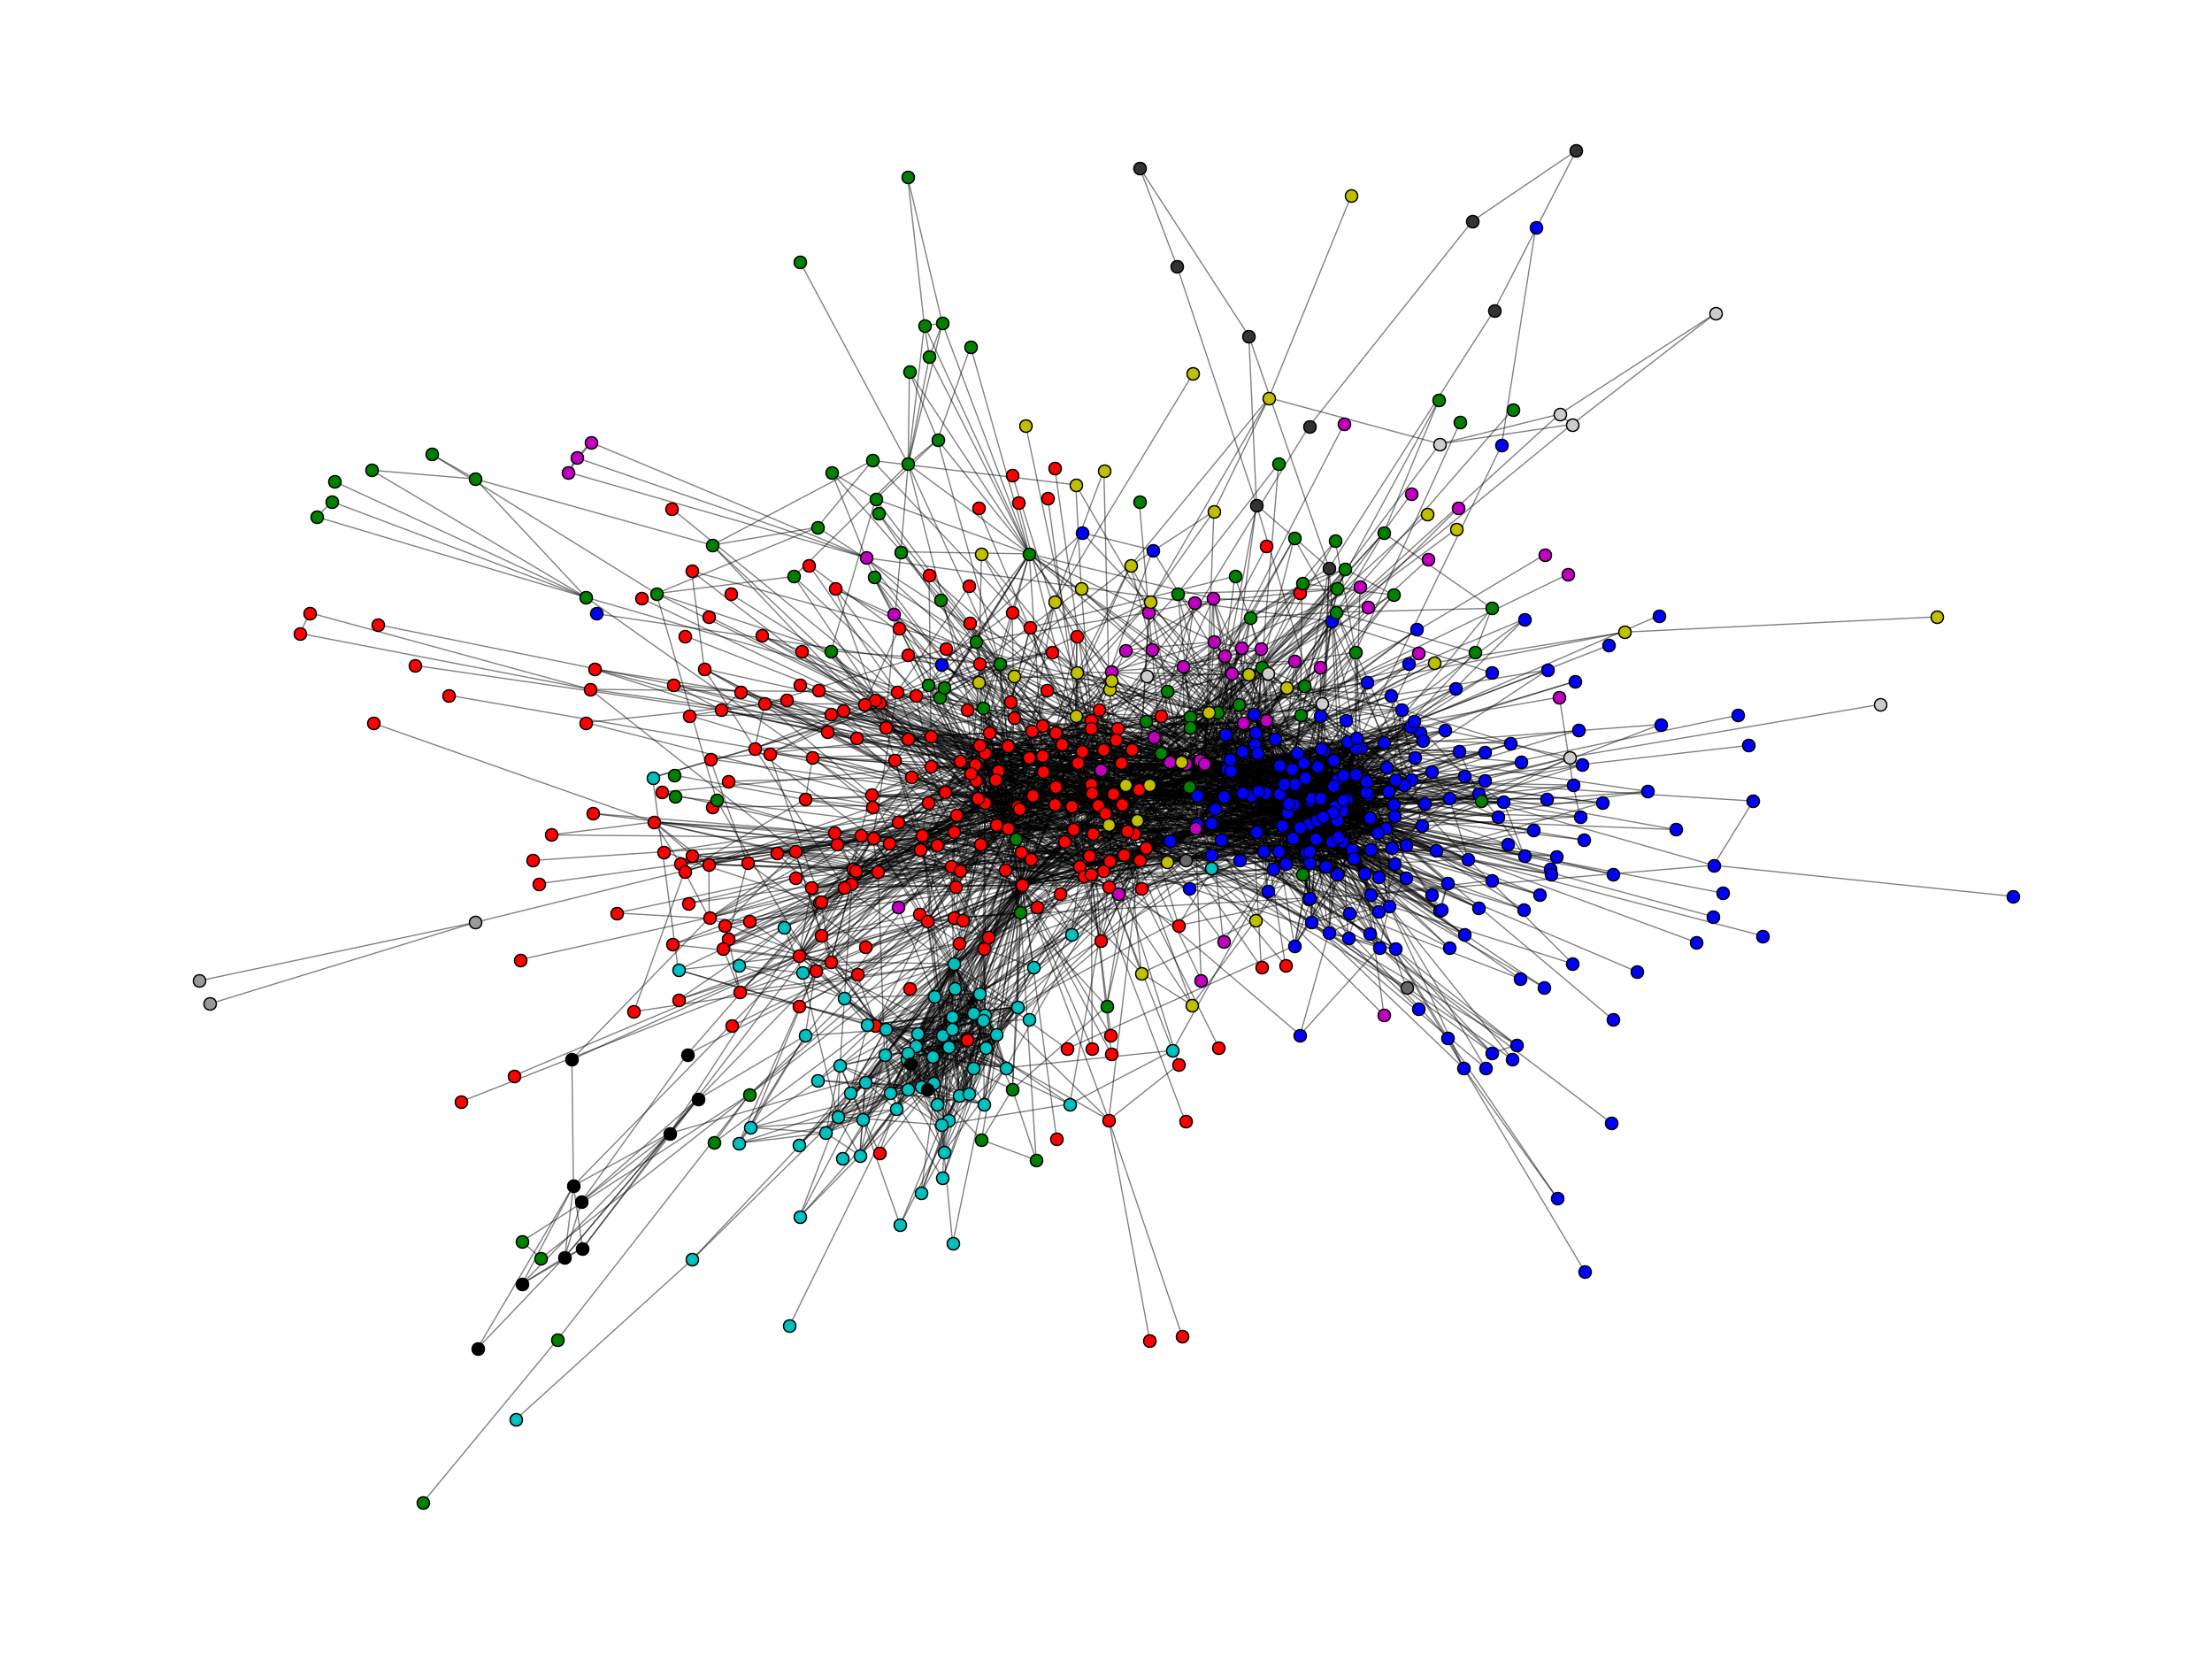

In [3]:
coms = NodeClustering(hasil, graph=None, method_name="your_method")
GProt=nx.graph
GProt = nx.read_gml("protein.gml")
pos = nx.spring_layout(GProt)
viz.plot_network_clusters(GProt, coms, pos, figsize = (32, 24), plot_labels =False, node_size =100 )
mod= nx.community.modularity(GProt, hasil)
print(mod)

In [4]:
def comdegreecentralitynormalisasi(G, coms, alpha,r):
    result={}
    for com in coms.communities:
        H = G.subgraph(com)
        for node in H.nodes():
            pembilang= H.degree[node]+(alpha**r)*(G.degree[node]-H.degree[node])
            penyebut=H.number_of_nodes()+(alpha**r)*(G.number_of_nodes()-H.number_of_nodes())-1
            #print(node,pembilang,penyebut, pembilang/penyebut)
            result[node]=pembilang/penyebut
    return(dict(sorted(result.items()))) 




In [23]:
# untuk SRC
cdcn=comdegreecentralitynormalisasi(GProt, coms,0.2,1)
print(cdcn['SRC'])  #alpha  = 0.2
cdcn=comdegreecentralitynormalisasi(GProt, coms,1,1)
print(cdcn['SRC'])  #alpha  = 1
simpul= 'SRC'
print(simpul in coms.communities[1])  # SRC berada di komunitas 1
H = GProt.subgraph(coms.communities[1])
print(H.degree['SRC'])   #dc
print(GProt.degree['SRC'])
print(GProt.degree['SRC']-H.degree['SRC'])  #dc aksen
print(len(GProt.nodes()))
print(len(coms.communities[1]))   #nc
print(len(GProt.nodes())-len(coms.communities[1])) #nc aksen


0.29335071707953064
0.15669515669515668
True
85
110
25
703
209
494


In [24]:
# untuk TP53
cdcn=comdegreecentralitynormalisasi(GProt, coms,0.2,1)
print(cdcn['TP53'])  #alpha  = 0.2
cdcn=comdegreecentralitynormalisasi(GProt, coms,1,1)
print(cdcn['TP53'])  #alpha  = 1
simpul= 'TP53'
print(simpul in coms.communities[0])  # TP53 berada di komunitas 1
H = GProt.subgraph(coms.communities[0])
print(H.degree['TP53'])   #dc
print(GProt.degree['TP53'])
print(GProt.degree['TP53']-H.degree['TP53'])  #dc aksen
print(len(GProt.nodes()))
print(len(coms.communities[0]))   #nc
print(len(GProt.nodes())-len(coms.communities[0])) #nc aksen


0.2187886279357231
0.16809116809116809
True
59
118
59
703
230
473


# Degree Centrality

['TP53', 'SRC']


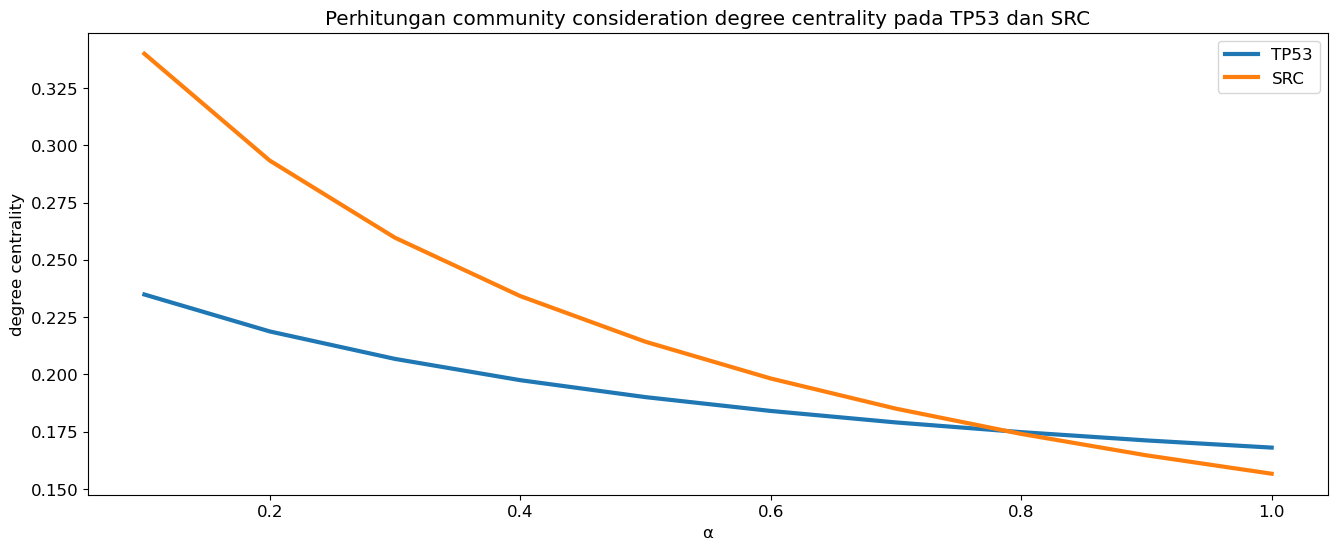

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,SRC,SRC,SRC,SRC,SRC,SRC,SRC,TP53,TP53
1,PIK3R1,PIK3R1,PIK3R1,PIK3R1,PIK3R1,PIK3R1,TP53,SRC,SRC
2,PIK3CA,PIK3CA,PIK3CA,PIK3CA,PIK3CA,TP53,PIK3R1,PIK3R1,PIK3R1
3,HRAS,HRAS,HRAS,HRAS,TP53,PIK3CA,PIK3CA,PIK3CA,PIK3CA
4,BRCA1,EP300,EP300,EP300,HRAS,HRAS,EP300,EP300,CTNNB1
5,EP300,KRAS,TP53,TP53,EP300,EP300,HRAS,CTNNB1,EP300
6,ATM,PTPN11,KRAS,KRAS,CTNNB1,CTNNB1,CTNNB1,HRAS,AKT1
7,KRAS,TP53,PTPN11,CTNNB1,KRAS,AKT1,AKT1,AKT1,HRAS
8,PTPN11,FYN,FYN,PTPN11,PTPN11,KRAS,KRAS,KRAS,KRAS
9,FYN,SOS1,SOS1,FYN,AKT1,PTPN11,PTPN11,PTPN11,PTPN11


In [25]:
# membuat dataframe yang berisi degree centrality per alpha
df = pd.DataFrame()
for alpha in np.arange(0,1.1,0.1):
    cdcn=comdegreecentralitynormalisasi(GProt, coms,alpha,1)
    df[round(alpha,2)]=pd.DataFrame.from_dict(cdcn,orient='index')

#df.to_excel("DC DM PPI.xlsx") 
df.head()

# memfilter top ten per alpha
set_top=set()
for alpha in np.arange(0.9, 1, 0.1):
    data_top=df.sort_values(by=round(alpha,1), ascending=False).head(2)
    for el in list(data_top.index):
        set_top.add(el)
list_top=list(set_top)
print(list_top)
df2=df.loc[list_top]

# menampilkan plot
dft = df2.T
dft = dft.drop(labels=0, axis=0)
listindex=list(df2.index)
listindex=listindex[0:30]
df2.head()
plt=reload(plt)
xpoints = np.arange(0.1,1.1,0.1)
plt.figure(figsize=(16,6))
plt.rcParams.update({'font.size': 12})

#for i in range(dft.shape[0]):
for i in listindex:   
    plt.plot(xpoints, dft[i], label = i,  linewidth=3)
#plt.plot(xpoints, dft[33], label = "curve 2")
plt.title("Perhitungan community consideration degree centrality pada TP53 dan SRC")
plt.xlabel("α")
plt.ylabel("degree centrality")
plt.legend(bbox_to_anchor=(1, 1))
#plt.legend()
plt.savefig('DC PPI.png')
plt.show()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
for alpha in np.arange(0.1, 1, 0.1):
    df3[round(alpha,1)]=df2[round(alpha,1)].rank(method='first')
listindex=list(df3.index) 
for alpha in np.arange(0.1, 1, 0.1):
    df=df.sort_values(by=round(alpha,1), ascending=False).head(20)
    listindex=df.index
    df4[round(alpha,1)]=listindex
df4

# Closeness Centrality


In [28]:
#community closeness centrality yang baru
def closenesscentrality(G, coms, alpha,r):
    #network closeness centrality dengan perhitungan
    dictClosenessComNet={}    
    dictShortestPathNet={}
    listnodes= list(G.nodes())
    for el1 in listnodes:
        sum_SPLengthNet=0
        for el2 in listnodes:        
            sum_SPLengthNet=sum_SPLengthNet+nx.shortest_path_length(G, source=el1, target=el2)
        dictShortestPathNet[el1] = sum_SPLengthNet
    #print(dict(sorted(dictShortestPathNet.items())))
    
    dictShortestPathSG={}
    for com in coms.communities:
        SG = G.subgraph(com)
        for el1 in com:
            sum_SPLengthSG=0
            for el2 in com:
                sum_SPLengthSG=sum_SPLengthSG+nx.shortest_path_length(SG, source=el1, target=el2)
            dictShortestPathSG[el1] = sum_SPLengthSG
            pembilang= len( SG.nodes() ) +(alpha**r)* ( len(G.nodes())-len( SG.nodes() ))   -1
            penyebut=(dictShortestPathSG[el1] + (alpha**r) *(dictShortestPathNet[el1]-dictShortestPathSG[el1]))
            dictClosenessComNet[el1]=pembilang/penyebut
            if (el1=='EP300') or (el1=='SRC') or (el1=='TP53') : # hanya untuk memfilter EP300, SRC, TP53
                print(el1)
                print('nC',len( SG.nodes()))
                print('nG',len( G.nodes()))
                print('sigma C:',dictShortestPathSG[el1])
                print('sigma G:',dictShortestPathNet[el1])
                print ('CCCC: ', dictClosenessComNet[el1])
            
    #print(dict(sorted(dictShortestPathSG.items())))
    return(dict(sorted(dictClosenessComNet.items())))
    #dictClosenessComNet={}
    

In [30]:
df = pd.DataFrame()
for i in np.arange(0.2,1.1,0.8):  # hanya untuk memfilter alpha = 0.2 dan alpha =1
    print('alpha :', i)
    cc=closenesscentrality(GProt, coms, i,1)
    df[round(i,2)]=pd.DataFrame.from_dict(cc,orient='index')
#df.to_excel("CC DM PPI.xlsx") 
df.head()  

alpha : 0.2
TP53
nC 230
nG 703
sigma C: 442
sigma G: 1473
CCCC:  0.4992286331379204
EP300
nC 230
nG 703
sigma C: 398
sigma G: 1518
CCCC:  0.5202572347266882
SRC
nC 209
nG 703
sigma C: 349
sigma G: 1560
CCCC:  0.5189445196211095
alpha : 1.0
TP53
nC 230
nG 703
sigma C: 442
sigma G: 1473
CCCC:  0.47657841140529533
EP300
nC 230
nG 703
sigma C: 398
sigma G: 1518
CCCC:  0.4624505928853755
SRC
nC 209
nG 703
sigma C: 349
sigma G: 1560
CCCC:  0.45


,0.2,1.0
ABI1,0.385621,0.343781
ABL1,0.409988,0.408615
ABL2,0.307625,0.306416
ACKR3,0.293589,0.265808
ACSL3,0.219814,0.218148


In [34]:
df = pd.DataFrame()
for i in np.arange(0.1,1.1,0.1):  # hanya untuk memfilter alpha = 0.2 dan alpha =1
    print('alpha :', i)
    cc=closenesscentrality(GProt, coms, i,1)
    df[round(i,2)]=pd.DataFrame.from_dict(cc,orient='index')
#df.to_excel("CC DM PPI.xlsx") 
df.head() 

alpha : 0.1
TP53
nC 230
nG 703
sigma C: 442
sigma G: 1473
CCCC:  0.5068794716565768
EP300
nC 230
nG 703
sigma C: 398
sigma G: 1518
CCCC:  0.5417647058823529
SRC
nC 209
nG 703
sigma C: 349
sigma G: 1560
CCCC:  0.547543075941289
alpha : 0.2
TP53
nC 230
nG 703
sigma C: 442
sigma G: 1473
CCCC:  0.4992286331379204
EP300
nC 230
nG 703
sigma C: 398
sigma G: 1518
CCCC:  0.5202572347266882
SRC
nC 209
nG 703
sigma C: 349
sigma G: 1560
CCCC:  0.5189445196211095
alpha : 0.30000000000000004
TP53
nC 230
nG 703
sigma C: 442
sigma G: 1473
CCCC:  0.49367762544922134
EP300
nC 230
nG 703
sigma C: 398
sigma G: 1518
CCCC:  0.5053133514986377
SRC
nC 209
nG 703
sigma C: 349
sigma G: 1560
CCCC:  0.5000701951424962
alpha : 0.4
TP53
nC 230
nG 703
sigma C: 442
sigma G: 1473
CCCC:  0.48946629213483145
EP300
nC 230
nG 703
sigma C: 398
sigma G: 1518
CCCC:  0.4943262411347518
SRC
nC 209
nG 703
sigma C: 349
sigma G: 1560
CCCC:  0.4866810655147588
alpha : 0.5
TP53
nC 230
nG 703
sigma C: 442
sigma G: 1473
CCCC:  0.4861

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
ABI1,0.402313,0.385621,0.374396,0.366329,0.360253,0.355512,0.351708,0.348590,0.345987,0.343781
ABL1,0.411697,0.409988,0.409417,0.409131,0.408959,0.408844,0.408762,0.408701,0.408653,0.408615
ABL2,0.309130,0.307625,0.307122,0.306870,0.306719,0.306618,0.306546,0.306492,0.306450,0.306416
ACKR3,0.304435,0.293589,0.286219,0.280886,0.276848,0.273684,0.271138,0.269045,0.267295,0.265808
ACSL3,0.221880,0.219814,0.219121,0.218774,0.218566,0.218427,0.218327,0.218252,0.218194,0.218148


In [42]:
# memfilter top ten per alpha
set_top=set()
for alpha in np.arange(0.3, 0.4, 0.1):
    data_top=df.sort_values(by=round(alpha,1), ascending=False).head(2)
    for el in list(data_top.index):
        set_top.add(el)
list_top=list(set_top)
print(list_top)
df2=df.loc[list_top]


['TP53', 'EP300', 'SRC']


In [43]:
plt.figure(figsize=(16,6))
plt.rcParams.update({'font.size': 12})

<Figure size 1600x600 with 0 Axes>

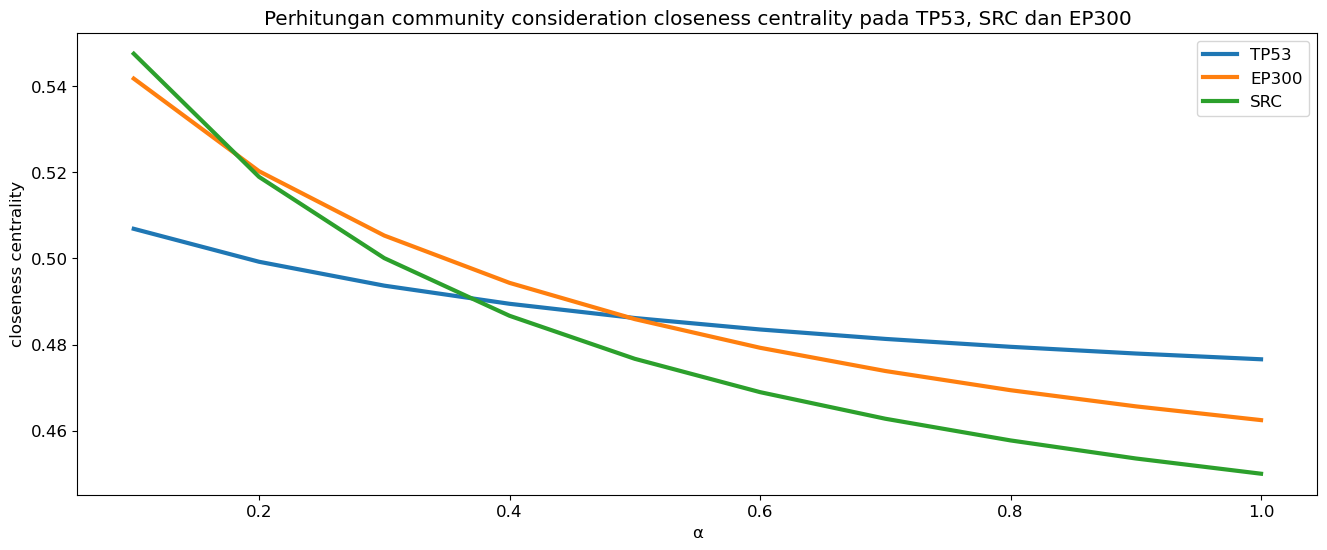

In [45]:
# menampilkan plot
dft = df2.T
#dft = dft.drop(labels=0, axis=0)
listindex=list(df2.index)
listindex=listindex[0:30]
df2.head()
plt=reload(plt)
xpoints = np.arange(0.1,1.1,0.1)
plt.figure(figsize=(16,6))
plt.rcParams.update({'font.size': 12})
#for i in range(dft.shape[0]):
for i in listindex:   
    plt.plot(xpoints, dft[i], label = i,  linewidth=3)
#plt.plot(xpoints, dft[33], label = "curve 2")
plt.title("Perhitungan community consideration closeness centrality pada TP53, SRC dan EP300")
plt.xlabel("α")
plt.ylabel("closeness centrality")
plt.legend(bbox_to_anchor=(1, 1))
#plt.legend()
plt.savefig('CC PPI.png')
plt.show()

In [46]:
dft

,TP53,EP300,SRC
0.1,0.506879,0.541765,0.547543
0.2,0.499229,0.520257,0.518945
0.3,0.493678,0.505313,0.500070
0.4,0.489466,0.494326,0.486681
0.5,0.486162,0.485908,0.476689
0.6,0.483500,0.479252,0.468948
0.7,0.481310,0.473858,0.462773
0.8,0.479476,0.469397,0.457733
0.9,0.477918,0.465647,0.453541
1.0,0.476578,0.462451,0.450000


# Betweenness Centrality

In [47]:
def init_df_bc(G,coms):
    df = pd.DataFrame()

    dictBCSG={}
    dictPC={}
    for com in coms.communities:
        SG=G.subgraph(com)
        BCSG=nx.betweenness_centrality(SG, normalized=False)
        for el in com:
            dictPC[el]=(len(SG.nodes)-1)*(len(SG.nodes)-2)/2
        dictBCSG.update(BCSG)
    dictBCSG=dict(sorted(dictBCSG.items())) 
    dictBCG=nx.betweenness_centrality(G, normalized=False)    
    df['BCSG']=pd.DataFrame.from_dict(dictBCSG,orient='index')
    df['BCG']=pd.DataFrame.from_dict(dictBCG,orient='index')
    df['selisih']=df['BCG']-df['BCSG']
    df['pc']=pd.DataFrame.from_dict(dictPC,orient='index')
    df['pg']=(len(G.nodes)-1)*(len(G.nodes)-2)/2
    df['deltap']=df['pg']-df['pc']
    return df

def betweenness_centrality(G, coms,df,  alpha,r):
    dfs =(df['BCSG']+(alpha**r)*df["selisih"])/(df['pc']+(alpha**r)*df['deltap'])
    return dfs
    

In [48]:
df_bc=init_df_bc(GProt,coms)
df = pd.DataFrame()
r=1
for alpha in np.arange(0,1.1,0.1):
    df[round(alpha,1)]=  betweenness_centrality(GProt, coms,df_bc,  alpha,r)

In [49]:
df_bc.head()

,BCSG,BCG,selisih,pc,pg,deltap
ABI1,6.966296,12.397390,5.431094,21528.0,246051.0,224523.0
ABL1,0.000000,3053.928427,3053.928427,0.0,246051.0,246051.0
ABL2,0.000000,0.000000,0.000000,0.0,246051.0,246051.0
ACKR3,0.000000,0.000000,0.000000,21528.0,246051.0,224523.0
ACSL3,0.000000,0.000000,0.000000,1.0,246051.0,246050.0


In [54]:
print(df_bc['TP53':'TP53'])
print(df_bc['EP300':'EP300'])
print(df_bc['CTNNB1':'CTNNB1'])
print(df_bc['SMAD3':'SMAD3'])
print(df_bc['AKT2':'AKT2'])


             BCSG           BCG       selisih       pc        pg    deltap
TP53  3692.533083  34137.205173  30444.672089  26106.0  246051.0  219945.0
              BCSG           BCG       selisih       pc        pg    deltap
EP300  4186.319266  17718.183004  13531.863738  26106.0  246051.0  219945.0
               BCSG           BCG       selisih       pc        pg    deltap
CTNNB1  2883.901391  19189.265296  16305.363904  26106.0  246051.0  219945.0
              BCSG          BCG      selisih       pc        pg    deltap
SMAD3  2780.890547  11492.56897  8711.678423  26106.0  246051.0  219945.0
            BCSG          BCG      selisih     pc        pg    deltap
AKT2  111.703968  1689.175323  1577.471355  861.0  246051.0  245190.0


In [55]:
# menampilkan plot
dft = df.T
dft = dft.drop(labels=0, axis=0)

In [56]:
listindex=list(df.index)
listindex=listindex[0:5]

In [57]:
listindex=['TP53', 'EP300', 'CTNNB1', 'SMAD3', 'AKT2']

In [58]:
dft.head()

,ABI1,ABL1,ABL2,ACKR3,ACSL3,ACSL6,ACVR1,ACVR2A,AFF1,AFF4,...,XRCC2,YAP1,YES1,YWHAE,ZBTB16,ZEB1,ZFHX3,ZMYM2,ZNRF3,ZRSR2
0.1,0.000171,0.012412,0.0,0.0,0.0,0.0,0.001434,0.007872,0.000237,0.000425,...,0.000248,0.001883,0.004652,0.011633,0.000052,0.000693,0.0,0.0,0.0,0.0
0.2,0.000121,0.012412,0.0,0.0,0.0,0.0,0.001145,0.006288,0.000217,0.000222,...,0.000137,0.002357,0.003485,0.010052,0.000071,0.000541,0.0,0.0,0.0,0.0
0.3,0.000097,0.012412,0.0,0.0,0.0,0.0,0.000995,0.005460,0.000210,0.000154,...,0.000098,0.002605,0.002908,0.009513,0.000081,0.000462,0.0,0.0,0.0,0.0
0.4,0.000082,0.012412,0.0,0.0,0.0,0.0,0.000902,0.004952,0.000207,0.000121,...,0.000078,0.002757,0.002563,0.009241,0.000087,0.000413,0.0,0.0,0.0,0.0
0.5,0.000072,0.012412,0.0,0.0,0.0,0.0,0.000839,0.004608,0.000205,0.000100,...,0.000066,0.002860,0.002334,0.009078,0.000091,0.000380,0.0,0.0,0.0,0.0


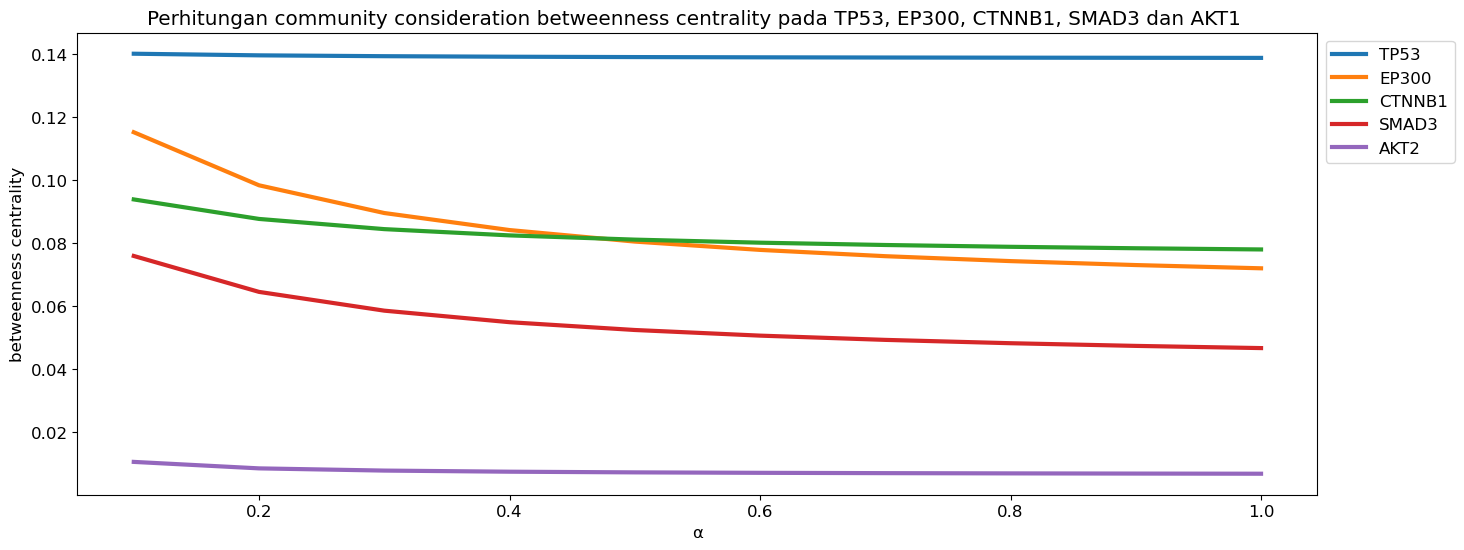

In [59]:
plt=reload(plt)
xpoints = np.arange(0.1,1.1,0.1)
plt.figure(figsize=(16,6))
plt.rcParams.update({'font.size': 12})

#for i in range(dft.shape[0]):
for i in listindex:   
    plt.plot(xpoints, dft[i], label = i,  linewidth=3)
#plt.plot(xpoints, dft[33], label = "curve 2")
plt.title("Perhitungan community consideration betweenness centrality pada TP53, EP300, CTNNB1, SMAD3 dan AKT1 ")
plt.xlabel("α")
plt.ylabel("betweenness centrality")
plt.legend(bbox_to_anchor=(1, 1))
#plt.legend()
plt.savefig('CC PPI.png')
plt.show()